In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import pathlib

import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns

In [2]:
# Parameters
celltype = "PBMC"

In [3]:
# Set Path
path = pathlib.Path(f"../data/{celltype}_preprocessed_sc_norm.parquet")

In [4]:
# import data
df = pq.read_table(path).to_pandas()

In [5]:
subset_df = df[
    [
        "oneb_Metadata_Treatment_Dose_Inhibitor_Dose",
        "Metadata_number_of_singlecells",
        "Metadata_Well",
        "Metadata_Treatment",
    ]
]

subset_df_path = pathlib.Path(f"./results/{celltype}_cell_counts.parquet")
# if path does not exist, create it
subset_df_path.parent.mkdir(parents=True, exist_ok=True)
subset_df.to_parquet(subset_df_path)

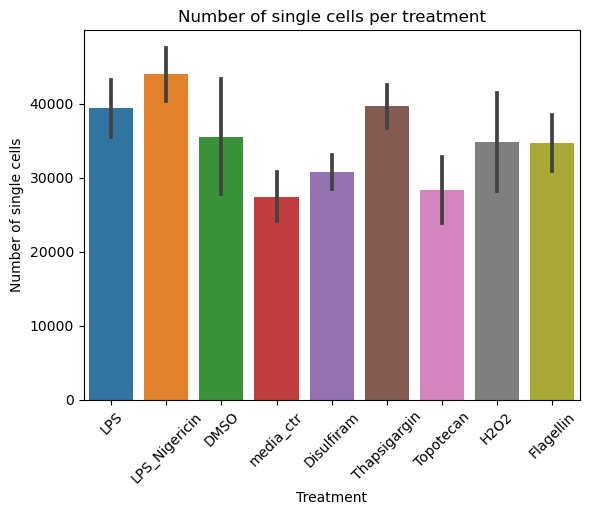

In [6]:
# barplot of number of single cells per treatment
sns.barplot(
    x="Metadata_Treatment",
    y="Metadata_number_of_singlecells",
    data=subset_df,
    estimator=np.mean,
    errorbar=("sd"),
)

plt.ylabel("Number of single cells")
plt.xlabel("Treatment")
plt.xticks(rotation=45)
plt.title("Number of single cells per treatment")

# if path does not exist, create it
pathlib.Path(f"Figures/cell_counts_plate2/{celltype}").mkdir(
    parents=True, exist_ok=True
)
# save figure
plt.savefig(
    f"Figures/cell_counts_plate2/{celltype}/Number_of_single_cells_per_treatment.png",
    bbox_inches="tight",
)
plt.show()
plt.close()

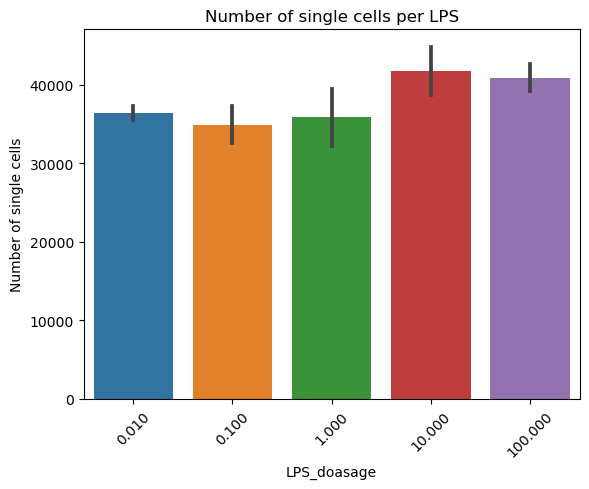

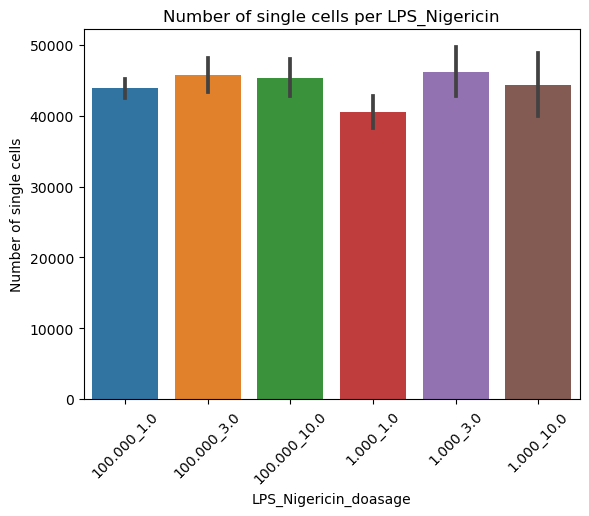

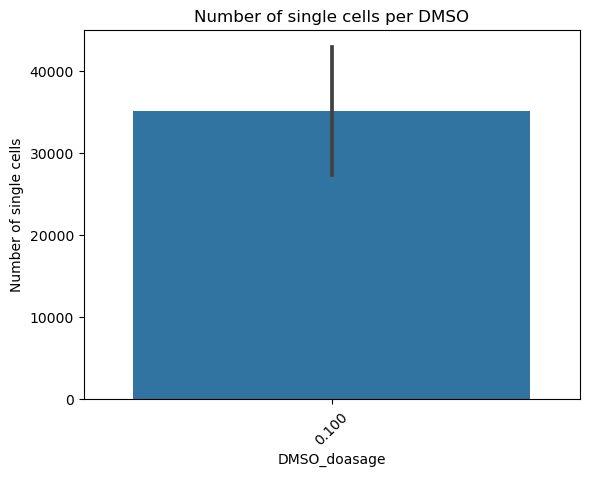

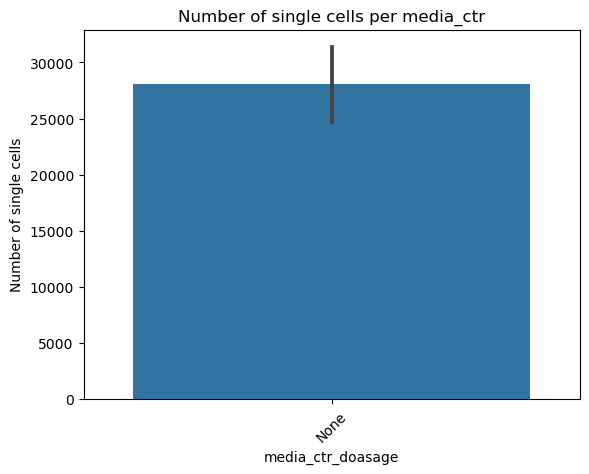

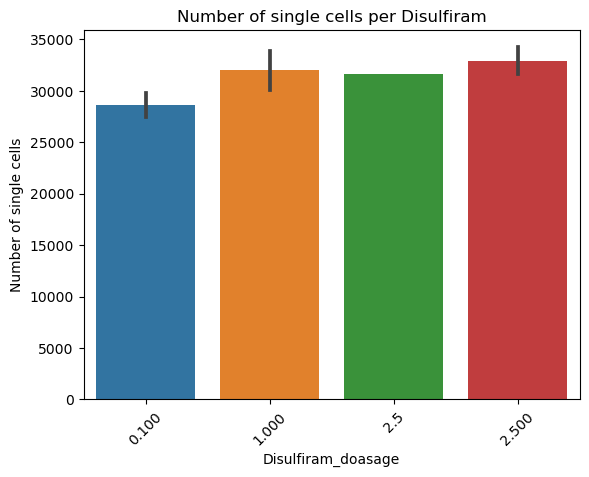

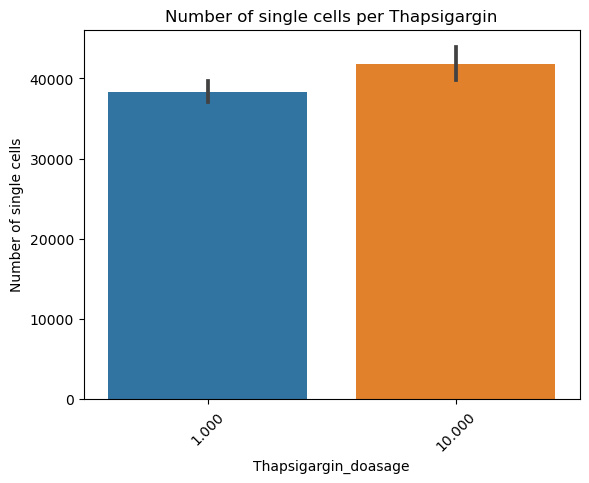

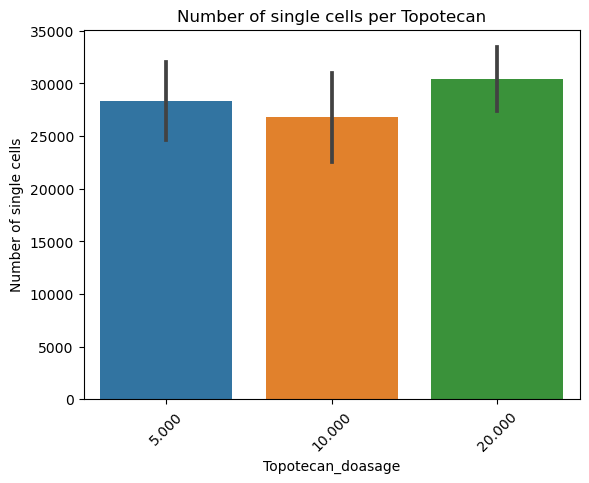

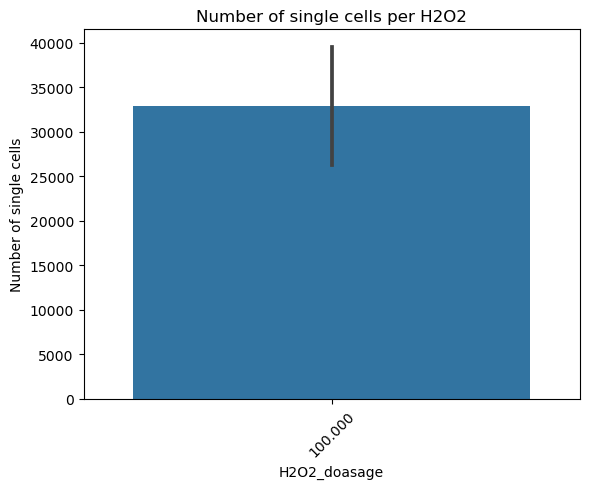

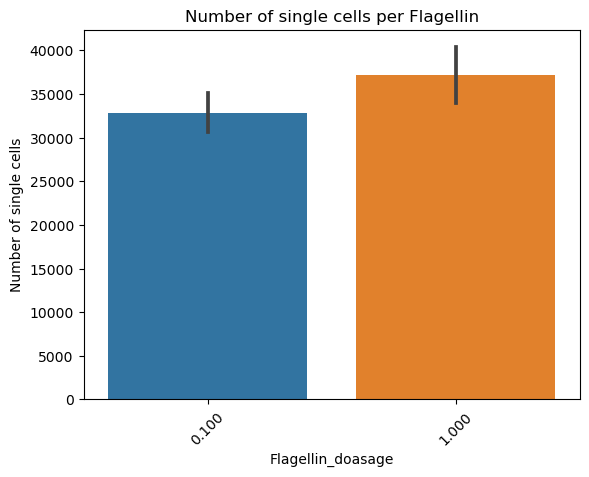

In [7]:
# if path does not exist, create it
pathlib.Path(f"Figures/cell_counts_plate2/{celltype}").mkdir(
    parents=True, exist_ok=True
)

# Number of single cells per treatment and dose level
for i in df["Metadata_Treatment"].unique():
    tmp_df = df[df["Metadata_Treatment"] == i]
    sns.barplot(
        x="Metadata_Dose",
        y="Metadata_number_of_singlecells",
        # hue="Metadata_Treatment",
        estimator=np.median,
        data=tmp_df,
        errorbar=("sd"),
    )
    plt.xlabel(f"{i}_doasage")
    plt.ylabel("Number of single cells")
    plt.xticks(rotation=45)
    plt.title(f"Number of single cells per {i}")

    plt.savefig(
        f"Figures/cell_counts_plate2/{celltype}/Number_of_single_cells_per_{i}.png",
        bbox_inches="tight",
    )
    plt.show()
    plt.close()